In [93]:
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import OneHotEncoder

In [94]:
data = {k:v for k,v in np.load('./ORL_faces.npz').items()}

In [95]:
train_X,train_Y,test_X,test_Y = data['trainX'],data['trainY'],data['testX'],data['testY']

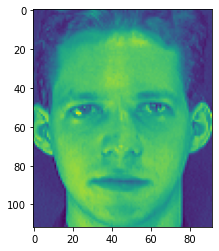

In [96]:
plt.imshow(train_X[0].reshape(112,92)/255)

In [97]:
print(train_Y[0])

0


In [98]:
np.unique(train_Y).shape[0]

20

In [99]:
def preprocessor(image):
    image = image.reshape(112,92,1)/255
    return image

In [100]:
train_X = np.apply_along_axis(preprocessor,1,train_X)
test_X = np.apply_along_axis(preprocessor,1,test_X)

In [101]:
ohe = OneHotEncoder(sparse=False)
train_Y = ohe.fit_transform(train_Y.reshape(-1,1))
test_Y = ohe.transform(test_Y.reshape(-1,1))

train_gen = ImageDataGenerator(data_format='channels_last').flow(train_X,train_Y)
val_gen = ImageDataGenerator(data_format='channels_last').flow(test_X,test_Y)

In [118]:
from tensorflow.keras import layers
# model = keras.Sequential(
#     [
#         layers.Conv2D(32, (3,3), activation="relu"),
#         layers.Conv2D(64, (3,3), activation="relu"),
#         layers.Flatten(),
#         layers.Dense(np.unique(data['trainY']).shape[0], activation='softmax'),
#     ]
# )
model = keras.Sequential(
    [
        layers.Conv2D(32, (3,3), activation="relu"),
        layers.Dropout(0.5),
        layers.Conv2D(64, (3,3), activation="relu"),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(np.unique(data['trainY']).shape[0], activation='softmax'),
    ]
)

In [122]:
model.compile(
    optimizer=keras.optimizers.SGD(),
    loss='categorical_crossentropy',
    metrics='accuracy',
)

In [123]:
history = model.fit(train_gen,validation_data=val_gen,epochs=12)

Epoch 1/12
8/8 [==============================] - 5s 662ms/step - loss: 0.0540 - accuracy: 1.0000 - val_loss: 0.3602 - val_accuracy: 0.9000
Epoch 2/12
8/8 [==============================] - 5s 657ms/step - loss: 0.0405 - accuracy: 0.9917 - val_loss: 0.5734 - val_accuracy: 0.9000
Epoch 3/12
8/8 [==============================] - 5s 638ms/step - loss: 0.0302 - accuracy: 1.0000 - val_loss: 0.3778 - val_accuracy: 0.9250
Epoch 4/12
8/8 [==============================] - 5s 658ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.3518 - val_accuracy: 0.9250
Epoch 5/12
8/8 [==============================] - 5s 647ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.3663 - val_accuracy: 0.9250
Epoch 6/12
8/8 [==============================] - 5s 655ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.3547 - val_accuracy: 0.9250
Epoch 7/12
8/8 [==============================] - 5s 644ms/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.4095 - val_accuracy: 0.9250
Epoch 8/12
8/8 [====

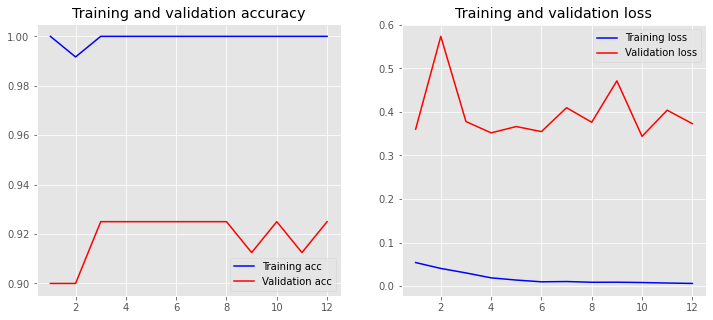

In [124]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)